# Exploratory Data Analysis
**Exploratory Data Analysis (EDA)** serves as the critical first step in the data analysis journey. It lays the groundwork for deeper analysis and statistical modeling. In this notebook, we will meticulously examine our dataset to ensure its quality and readiness for subsequent analysis. We will undertake the following essential tasks:

1. Determine the dataset's dimensions, revealing its size and shape.
2. Ascertain the data types present across all columns.
3. Measure the extent of missing values within the dataset.
4. Identify and count any duplicate entries.
5. Compile descriptive statistics for each column to understand data distributions.
6. Compute the correlation coefficients between variables to uncover relationships.
7. Plot histograms for each variable to visualize their frequency distributions.
8. Generate scatterplots to explore potential correlations between variables.
9. Compare the distribution of premium charges across age, gender, and their number of children.

## Import Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sample the Dataset

In [2]:
DATASET_URI = "dataset/insurance.csv"
df0 = pd.read_csv(DATASET_URI)

df0.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
1075,32,female,29.590,1,no,southeast,4562.84210
987,45,female,27.645,1,no,northwest,28340.18885
404,31,male,20.400,0,no,southwest,3260.19900
127,52,female,37.400,0,no,southwest,9634.53800
1057,45,female,31.790,0,no,southeast,17929.30337
170,63,male,41.470,0,no,southeast,13405.39030
439,26,male,29.450,0,no,northeast,2897.32350
617,49,male,25.600,2,yes,southwest,23306.54700
1126,55,male,29.900,0,no,southwest,10214.63600
387,50,male,25.365,2,no,northwest,30284.64294


## Size, Shape, Missing Values, and Duplicates

In [3]:
print(f"This dataset contains {df0.shape[0]}-rows and {df0.shape[1]}-columns with a total of {df0.size}-datapoints.")

This dataset contains 1338-rows and 7-columns with a total of 9366-datapoints.


In [6]:
pd.DataFrame(df0.isna().sum(), columns=["Missing Values"])

,Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
print(f"There is {df0.duplicated().sum()}-duplicated rows in this dataset.")

There is 1-duplicated rows in this dataset.


In [13]:
# Check the duplicated value
df0[df0.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# Drop the duplicated value
df0.drop_duplicates(inplace=True)
print(f"There is {df0.duplicated().sum()}-duplicated rows in this dataset.")

There is 0-duplicated rows in this dataset.


## Data Types

In [43]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Descriptive Statistics

In [48]:
df0.select_dtypes("number").describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df0.select_dtypes("object").describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## Correlation

In [53]:
df0.corr(numeric_only=True).style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [61]:
df0.corr(numeric_only=True, method="spearman").style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.107897,0.055813,0.533523
bmi,0.107897,1.000000,0.015643,0.119585
children,0.055813,0.015643,1.000000,0.132200
charges,0.533523,0.119585,0.132200,1.000000


# Histogram

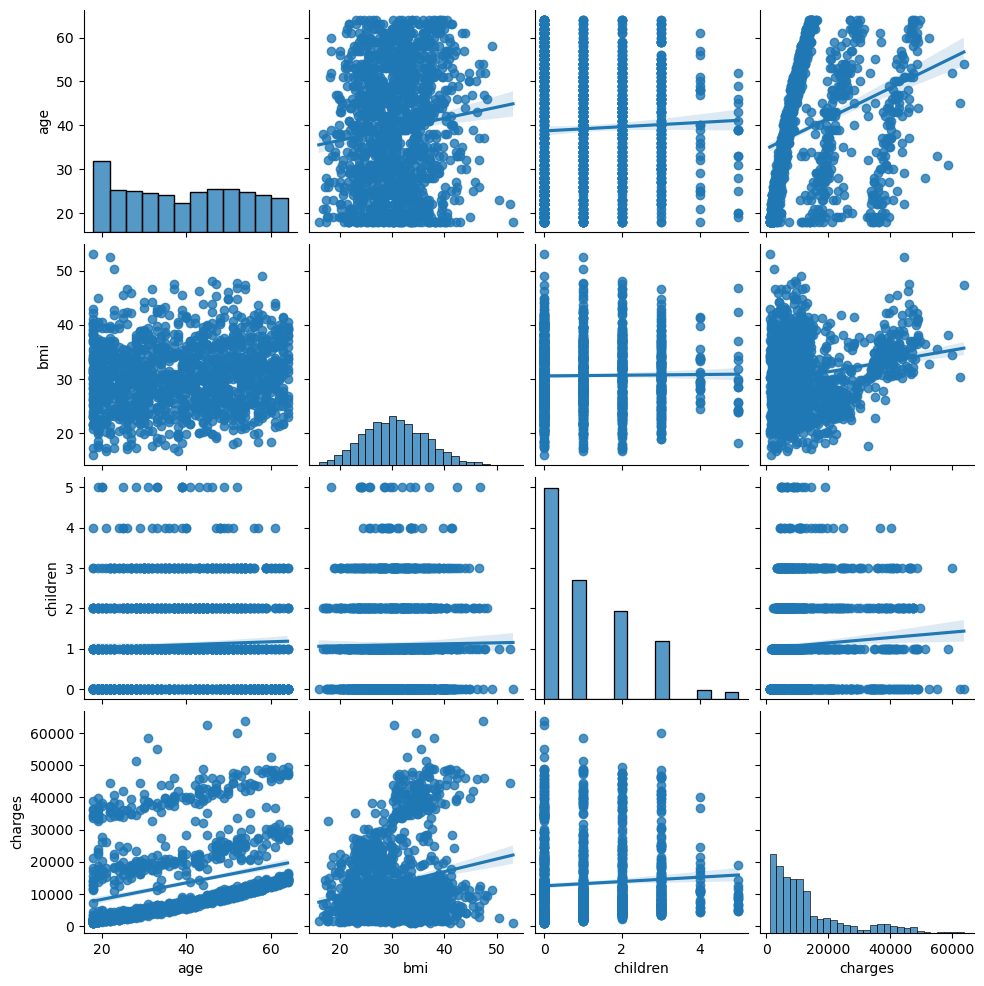

In [60]:
sns.pairplot(df0, kind="reg")

[Text(0.5, 1.0, 'Class Distribution: Sex')]

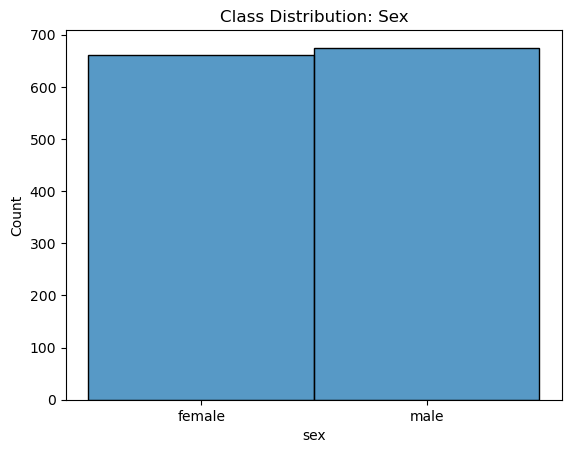

In [66]:
sns.histplot(df0, x="sex").set(title="Class Distribution: Sex")

In [68]:
df0["sex"].value_counts(normalize=True)

male      0.504862
female    0.495138
Name: sex, dtype: float64

[Text(0.5, 1.0, 'Class Distribution: smoker')]

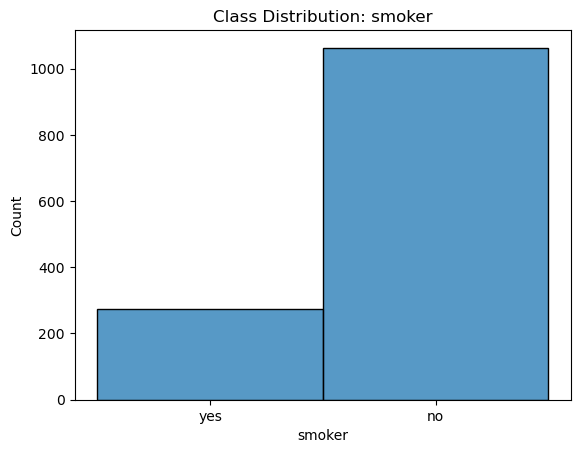

In [67]:
sns.histplot(df0, x="smoker").set(title="Class Distribution: smoker")

In [69]:
df0["smoker"].value_counts(normalize=True)

no     0.795064
yes    0.204936
Name: smoker, dtype: float64

[Text(0.5, 1.0, 'Class Distribution: region')]

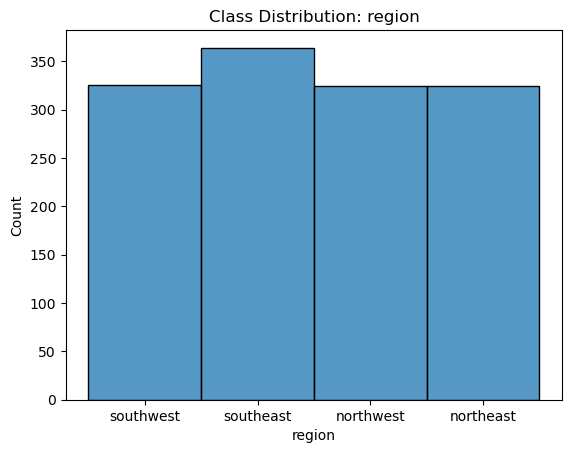

In [71]:
sns.histplot(df0, x="region").set(title="Class Distribution: region")

In [70]:
df0["region"].value_counts(normalize=True)

southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64

## Distribution of Charges

c:\Users\John Rey Faciolan\miniconda3\envs\LearnML\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


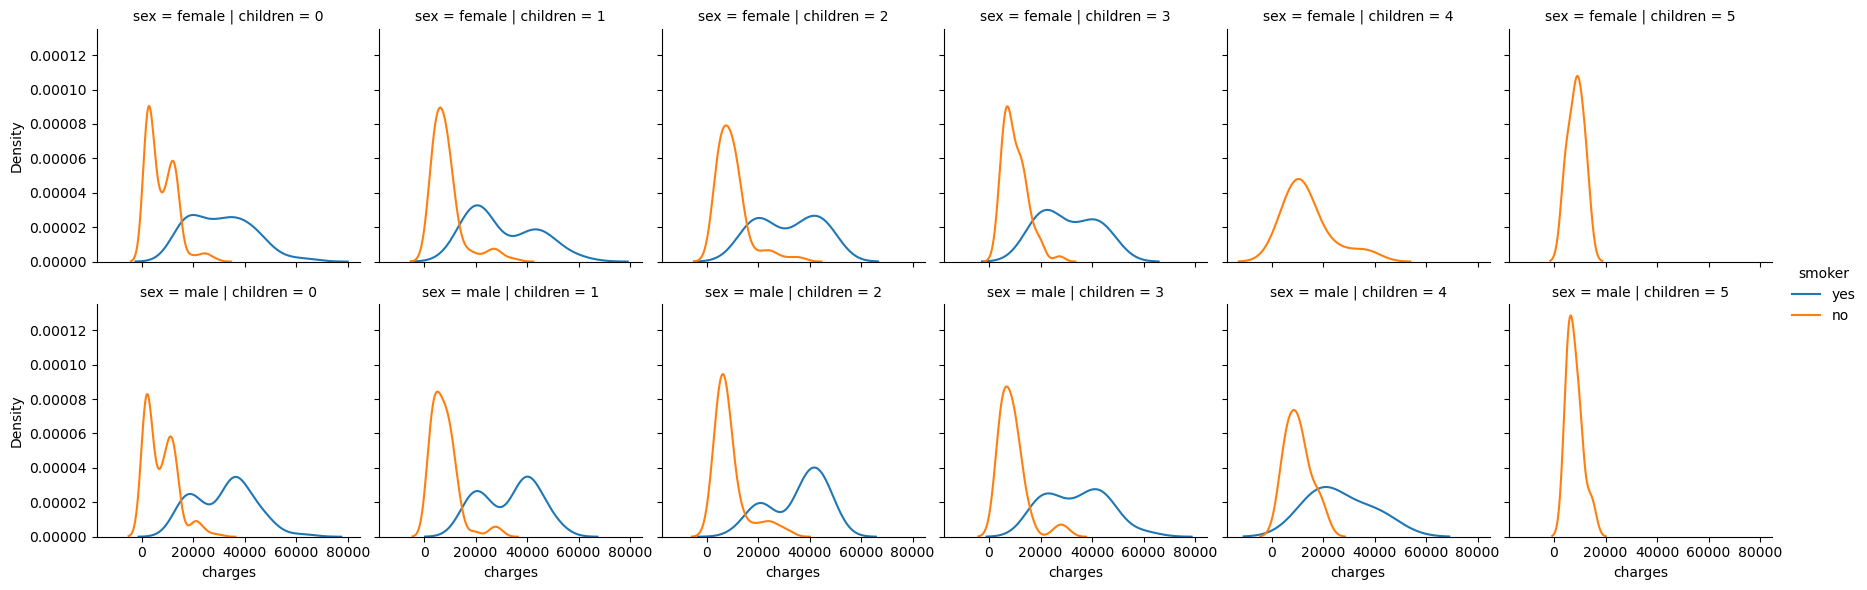

In [72]:
g = sns.FacetGrid(
    data=df0,
    row="sex",
    col="children",
    hue="smoker"
);
g.map(sns.kdeplot, "charges", );
g.add_legend();

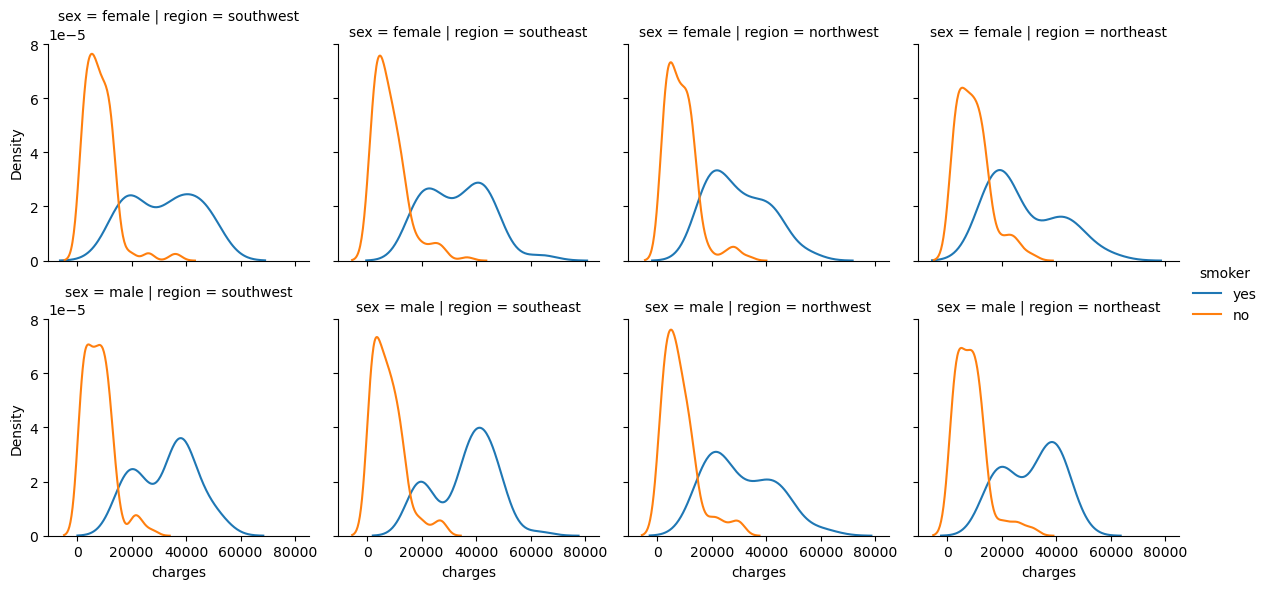

In [75]:
g = sns.FacetGrid(
    data=df0,
    row="sex",
    col="region",
    hue="smoker"
);
g.map(sns.kdeplot, "charges", );
g.add_legend();

## Key Findings

This dataset is comprehensive, featuring **1338 rows** and **7 columns**, encapsulating a robust **9366 data points**. Impressively, it maintains complete integrity with no missing values and only a single instance of duplication.

When examining the distribution patterns, we find that `age`, `bmi`, and `charges` are continuous variables. `Age` displays a uniform distribution, `bmi` follows a normal curve, and `charges` diverge with a skewed distribution. The `children` variable stands out as an unbalanced ordinal variable, predominantly representing insured individuals without children. The `charges` variable is a continuous variable with a large amount of outlier on the right side of its distribution.

Delving into class balance, `gender` and `region` showcase an equitable distribution across their respective classes. In contrast, the `smoker` variable reveals a pronounced skewness, with a higher prevalence of non-smokers in the dataset.

Correlation analysis unveils that `age` and `bmi` are the top influencers on `charges`, with Pearson correlation coefficients of $0.3$ and $0.2$, respectively. Although these figures suggest a weak correlation, a deeper look through the Spearman rank correlation coefficient indicates a strong relationship between `age` and `charges`. This suggests that `charges` tend to rise with age, albeit in a non-linear fashion.

When examining the distribution of premium charges, non-smokers shows a much lower premium charges regardless of gender and their number of children, and which region they live.

## Recommendations
Based on the above findings, the following items were recommended before building a statistical model.

### Hypothesis Testing
1. Test if male insured were charged higher than female insured.
2. Test whether non-smokers were charged lowere than smokers.
3. Test if the premium charges were the same across all regions.

### Data Encoding
1. Encode `age` and `bmi` as continuous numerical variables.
2. Encode `children` variable as a discrete numerical.
3. Encode `sex`, `smoker`, and `region` as categorical variable using one-hot encoding scheme.
4. Encode `charges` as continuous numerical variable. But since its a long-tailed distribution, a log-transformation is recommended to make its distribution near-normal.